## Data Loading

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import pickle
import matplotlib.pyplot as plt

c:\Users\Tulsi Chopade\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path="Train"
test_path="Test"
val_path="Validation"
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [3]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224),batch_size = 32,class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,target_size = (224, 224),batch_size = 32,class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,target_size = (224, 224),batch_size = 32,class_mode = 'sparse')

Found 320 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [5]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [6]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((320,), (40,), (40,))

# VGG

In [7]:
# vgg = VGG19(input_shape=224,224,3 + [4], weights='imagenet', include_top=False)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

vgg_model = Model(inputs=vgg.input, outputs=prediction)

vgg_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)  #Early stopping to avoid overfitting of model

# fit the model
history = vgg_model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

# view the structure of the model
vgg_model.summary()

Epoch 1/50
10/10 [==============================] - 68s 7s/step - loss: 1.4454 - accuracy: 0.4750 - val_loss: 0.7330 - val_accuracy: 0.7750
Epoch 2/50
10/10 [==============================] - 73s 7s/step - loss: 0.3227 - accuracy: 0.8969 - val_loss: 0.2139 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 73s 7s/step - loss: 0.0799 - accuracy: 0.9812 - val_loss: 0.3011 - val_accuracy: 0.9000
Epoch 4/50
10/10 [==============================] - 73s 7s/step - loss: 0.0313 - accuracy: 0.9937 - val_loss: 0.0714 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 72s 7s/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9000
Epoch 6/50
10/10 [==============================] - 71s 7s/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9000
Epoch 7/50
10/10 [==============================] - 71s 7s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9500
Epoch 8/50
10/10 [==

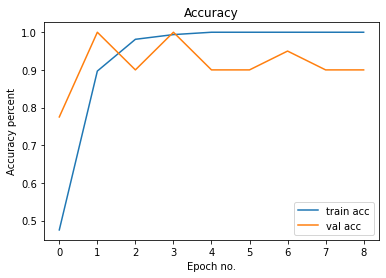

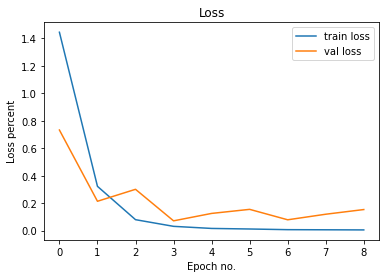

In [8]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('vgg-acc-rps-1.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [9]:
vgg_model.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 7s 2s/step - loss: 0.0174 - accuracy: 1.0000


[0.017367616295814514, 1.0]

2/2 [==============================] - 8s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



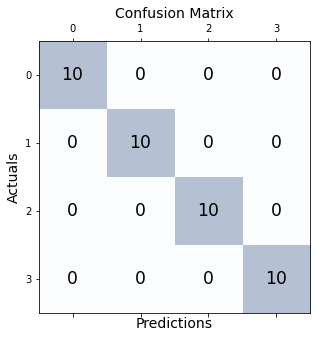

In [10]:
# VGG Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=vgg_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))


#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [11]:
with open('VGG.pkl', 'wb') as file:
    pickle.dump(vgg_model, file)

INFO:tensorflow:Assets written to: ram://b2c40903-3d48-4c4a-962a-afec890d1d6b/assets


INFO:tensorflow:Assets written to: ram://b2c40903-3d48-4c4a-962a-afec890d1d6b/assets


# Resnet

In [12]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
#do not train the pre-trained layers of Resnet
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

resnet_model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model


resnet_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

# fit the model

history = resnet_model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)


resnet_model.summary()

Epoch 1/50
10/10 [==============================] - 49s 4s/step - loss: 5.7001 - accuracy: 0.2844 - val_loss: 4.0465 - val_accuracy: 0.4250
Epoch 2/50
10/10 [==============================] - 38s 4s/step - loss: 2.3966 - accuracy: 0.3688 - val_loss: 1.3380 - val_accuracy: 0.4250
Epoch 3/50
10/10 [==============================] - 38s 4s/step - loss: 1.1672 - accuracy: 0.5719 - val_loss: 0.6305 - val_accuracy: 0.7250
Epoch 4/50
10/10 [==============================] - 37s 4s/step - loss: 0.5623 - accuracy: 0.7781 - val_loss: 0.6118 - val_accuracy: 0.8000
Epoch 5/50
10/10 [==============================] - 38s 4s/step - loss: 0.4942 - accuracy: 0.7875 - val_loss: 0.7818 - val_accuracy: 0.7250
Epoch 6/50
10/10 [==============================] - 38s 4s/step - loss: 0.5953 - accuracy: 0.7531 - val_loss: 0.6617 - val_accuracy: 0.7500
Epoch 7/50
10/10 [==============================] - 39s 4s/step - loss: 0.4866 - accuracy: 0.8219 - val_loss: 0.5501 - val_accuracy: 0.7500
Epoch 8/50
10/10 [==

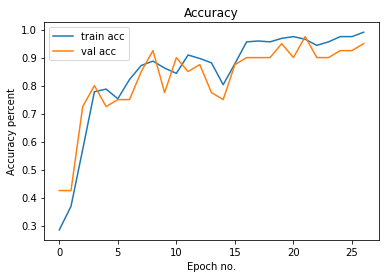

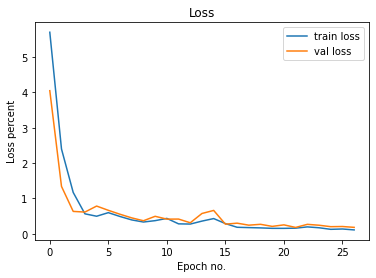

In [13]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('resnet-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('resnet-loss.png')
plt.show()

In [14]:
resnet_model.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 4s 1s/step - loss: 0.1979 - accuracy: 0.9250


[0.19786646962165833, 0.925000011920929]

2/2 [==============================] - 5s 777ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.82      0.86        11
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        10

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.93        40
weighted avg       0.93      0.93      0.92        40



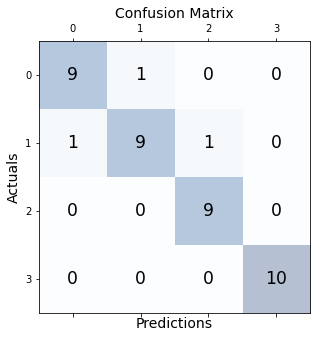

In [15]:
# Resnet Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=resnet_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [16]:
with open('Resnet.pkl', 'wb') as file:
    pickle.dump(resnet_model, file)

INFO:tensorflow:Assets written to: ram://adb93ec5-6826-46a1-886e-7d3b36e0776c/assets


INFO:tensorflow:Assets written to: ram://adb93ec5-6826-46a1-886e-7d3b36e0776c/assets


# Inception

In [17]:
InceptionV3 = InceptionV3(input_shape=(224,224,3),weights='imagenet', include_top=False)
#do not train the pre-trained layers of InceptionV3
for layer in InceptionV3.layers:
    layer.trainable = False

x = Flatten()(InceptionV3.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

InceptionV3_model = Model(inputs=InceptionV3.input, outputs=prediction)
# view the structure of the model


InceptionV3_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

# fit the model

history = InceptionV3_model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

InceptionV3_model.summary()

Epoch 1/50
10/10 [==============================] - 24s 2s/step - loss: 3.1629 - accuracy: 0.6906 - val_loss: 0.2652 - val_accuracy: 0.9500
Epoch 2/50
10/10 [==============================] - 19s 2s/step - loss: 0.1337 - accuracy: 0.9719 - val_loss: 0.5043 - val_accuracy: 0.9250
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 0.0165 - accuracy: 0.9937 - val_loss: 0.2061 - val_accuracy: 0.9500
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 1.2408e-04 - accuracy: 1.0000 - val_loss: 0.2046 - val_accuracy: 0.9250
Epoch 5/50
10/10 [==============================] - 22s 2s/step - loss: 7.2323e-04 - accuracy: 1.0000 - val_loss: 0.3102 - val_accuracy: 0.9250
Epoch 6/50
10/10 [==============================] - 21s 2s/step - loss: 9.5556e-05 - accuracy: 1.0000 - val_loss: 0.3868 - val_accuracy: 0.9250
Epoch 7/50
10/10 [==============================] - 21s 2s/step - loss: 4.1700e-05 - accuracy: 1.0000 - val_loss: 0.4255 - val_accuracy: 0.9250
Epoc

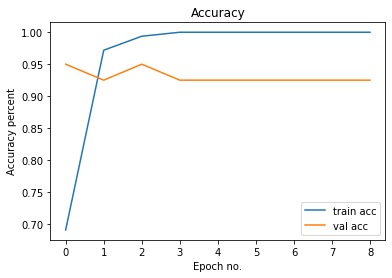

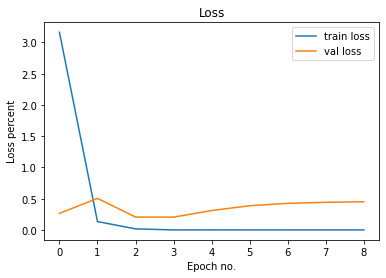

In [18]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('inception-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('inception-loss.png')
plt.show()

In [20]:
InceptionV3_model.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 2s 676ms/step - loss: 0.5390 - accuracy: 0.9500


[0.5390228629112244, 0.949999988079071]

2/2 [==============================] - 3s 400ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9
           3       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



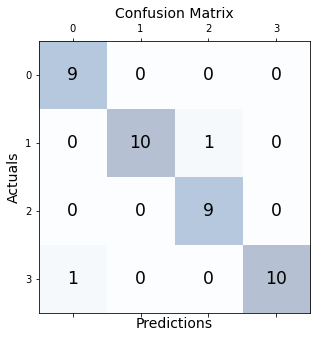

In [21]:
# Inception Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=InceptionV3_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [23]:
with open('InceptionV3.pkl', 'wb') as file:
    pickle.dump(InceptionV3_model, file)

INFO:tensorflow:Assets written to: ram://26250562-78ba-41c8-b1a4-e18d4fde452a/assets


INFO:tensorflow:Assets written to: ram://26250562-78ba-41c8-b1a4-e18d4fde452a/assets


In [22]:
vgg_model.save('vgg.tf')
resnet_model.save('resnet.tf')
InceptionV3_model.save('inception.tf')

INFO:tensorflow:Assets written to: vgg.tf\assets


INFO:tensorflow:Assets written to: vgg.tf\assets


INFO:tensorflow:Assets written to: resnet.tf\assets


INFO:tensorflow:Assets written to: resnet.tf\assets


INFO:tensorflow:Assets written to: inception.tf\assets


INFO:tensorflow:Assets written to: inception.tf\assets


# VGG + Resnet + Inception

In [24]:
from tensorflow.keras.models import load_model
model1 = load_model('vgg.tf')
model2 = load_model('resnet.tf')
model3 = load_model('inception.tf')
import tensorflow.keras
import tensorflow as tf
#Initiating the usage of individual models
keras_model = tensorflow.keras.models.load_model('vgg.tf', compile=False) 
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('resnet.tf', compile=False) 
keras_model2._name = 'model2'
keras_model3 = tensorflow.keras.models.load_model('inception.tf', compile=False) 
keras_model3._name = 'model3'
models = [keras_model, keras_model2, keras_model3] #stacking individual models in a list
model_input = tf.keras.Input(shape=(224, 224, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [25]:
ensemble_model.summary() #prints a comprehensive summary of the Keras model

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model1 (Functional)            (None, 4)            14815044    ['input_4[0][0]']                
                                                                                                  
 model2 (Functional)            (None, 4)            23989124    ['input_4[0][0]']                
                                                                                                  
 model3 (Functional)            (None, 4)            22007588    ['input_4[0][0]']          

In [29]:
tf.keras.utils.plot_model(ensemble_model, 'model1.png', show_shapes= True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
ensemble_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

# fit the model

history = ensemble_model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  batch_size=32,shuffle=True)

Epoch 1/20
10/10 [==============================] - 313s 30s/step - loss: 0.3073 - accuracy: 0.9969 - val_loss: 0.4029 - val_accuracy: 0.9750
Epoch 2/20
10/10 [==============================] - 300s 30s/step - loss: 0.3068 - accuracy: 1.0000 - val_loss: 0.3736 - val_accuracy: 0.9500
Epoch 3/20
10/10 [==============================] - 301s 30s/step - loss: 0.3043 - accuracy: 1.0000 - val_loss: 0.3853 - val_accuracy: 0.9750
Epoch 4/20
10/10 [==============================] - 289s 29s/step - loss: 0.3065 - accuracy: 0.9969 - val_loss: 0.3805 - val_accuracy: 0.9500
Epoch 5/20
10/10 [==============================] - 298s 30s/step - loss: 0.3062 - accuracy: 1.0000 - val_loss: 0.4124 - val_accuracy: 0.9250
Epoch 6/20
10/10 [==============================] - 296s 30s/step - loss: 0.3127 - accuracy: 0.9937 - val_loss: 0.4055 - val_accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 300s 30s/step - loss: 0.3041 - accuracy: 1.0000 - val_loss: 0.4029 - val_accuracy: 0.9000
Epoch 

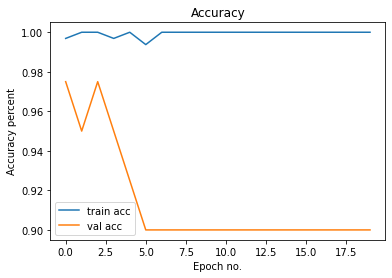

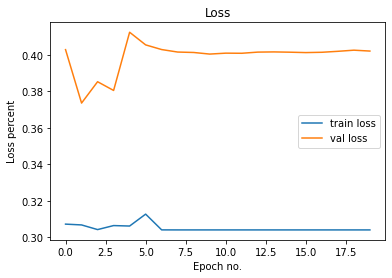

In [35]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('ensemble-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('ensemble-loss.png')
plt.show()

In [36]:
ensemble_model.evaluate(test_x,test_y,batch_size=32)

2/2 [==============================] - 28s 6s/step - loss: 0.3616 - accuracy: 0.9750


[0.36161381006240845, 0.9750000238418579]

2/2 [==============================] - 33s 6s/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



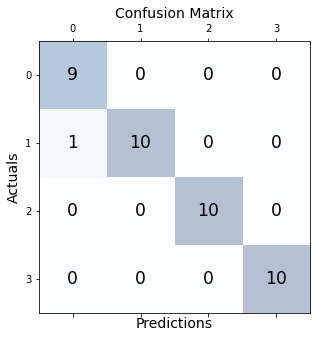

In [37]:
# Ensemble Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=ensemble_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [38]:
ensemble_model.save('ensemble.tf')

INFO:tensorflow:Assets written to: ensemble.tf\assets


INFO:tensorflow:Assets written to: ensemble.tf\assets


In [39]:
with open('VGG_Inc_Res.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

INFO:tensorflow:Assets written to: ram://0b8f3e9a-fa26-4a28-b6fd-100165227ec6/assets


INFO:tensorflow:Assets written to: ram://0b8f3e9a-fa26-4a28-b6fd-100165227ec6/assets


# VGG + Resnet

Epoch 1/50
10/10 [==============================] - 320s 32s/step - loss: 0.5443 - accuracy: 0.3406 - val_loss: 0.5422 - val_accuracy: 0.2500
Epoch 2/50
10/10 [==============================] - 345s 35s/step - loss: 0.5418 - accuracy: 0.2500 - val_loss: 0.8457 - val_accuracy: 0.2500
Epoch 3/50
10/10 [==============================] - 314s 32s/step - loss: 0.5275 - accuracy: 0.2500 - val_loss: 0.8202 - val_accuracy: 0.2500
Epoch 4/50
10/10 [==============================] - 314s 32s/step - loss: 0.5206 - accuracy: 0.2500 - val_loss: 0.5968 - val_accuracy: 0.2500
Epoch 5/50
10/10 [==============================] - 314s 32s/step - loss: 0.5208 - accuracy: 0.2500 - val_loss: 0.5768 - val_accuracy: 0.2500
Epoch 6/50
10/10 [==============================] - 314s 32s/step - loss: 0.5204 - accuracy: 0.2500 - val_loss: 0.6258 - val_accuracy: 0.2500
Epoch 6: early stopping


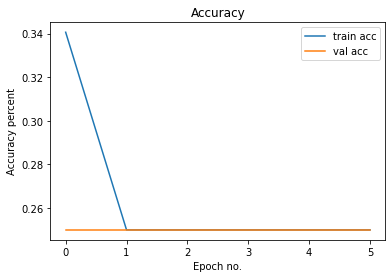

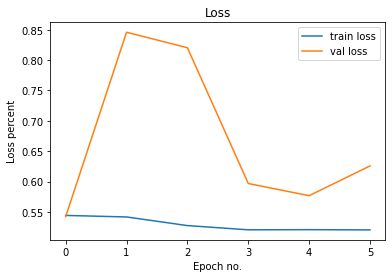

In [40]:
from tensorflow.keras.models import load_model
model1 = load_model('vgg.tf')
model2 = load_model('resnet.tf')
import tensorflow.keras
import tensorflow as tf
#Initiating the usage of individual models
keras_model = tensorflow.keras.models.load_model('vgg.tf', compile=False) 
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('resnet.tf', compile=False) 
keras_model2._name = 'model2'
models = [keras_model, keras_model2] #stacking individual models in a list
model_input = tf.keras.Input(shape=(224, 224, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model_vgg_res = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

ensemble_model_vgg_res.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = ensemble_model_vgg_res.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('vggResnet-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('vggResnet-loss.png')
plt.show()

2/2 [==============================] - 35s 7s/step - loss: 0.5326 - accuracy: 0.2500


2/2 [==============================] - 36s 7s/step
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        40
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.25        40
   macro avg       0.25      0.06      0.10        40
weighted avg       1.00      0.25      0.40        40



c:\Users\Tulsi Chopade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tulsi Chopade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tulsi Chopade\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

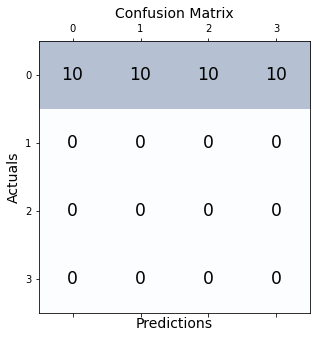

In [41]:
ensemble_model_vgg_res.evaluate(test_x,test_y,batch_size=32)

# Ensemble Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=ensemble_model_vgg_res.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [42]:
ensemble_model_vgg_res.save('VGG_Resnet.tf')

INFO:tensorflow:Assets written to: VGG_Resnet.tf\assets


INFO:tensorflow:Assets written to: VGG_Resnet.tf\assets


In [43]:
with open('VGG_Res.pkl', 'wb') as file:
    pickle.dump(ensemble_model_vgg_res, file)

INFO:tensorflow:Assets written to: ram://ee6c922a-76f6-4531-b40d-b07a76b3d8ad/assets


INFO:tensorflow:Assets written to: ram://ee6c922a-76f6-4531-b40d-b07a76b3d8ad/assets


# VGG + Inception

Epoch 1/50
10/10 [==============================] - 394s 38s/step - loss: 0.0641 - accuracy: 0.9844 - val_loss: 0.2513 - val_accuracy: 0.8500
Epoch 2/50
10/10 [==============================] - 364s 37s/step - loss: 0.0835 - accuracy: 0.9187 - val_loss: 0.1338 - val_accuracy: 0.9000
Epoch 3/50
10/10 [==============================] - 297s 30s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.1260 - val_accuracy: 0.9500
Epoch 4/50
10/10 [==============================] - 300s 30s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 0.9500
Epoch 5/50
10/10 [==============================] - 295s 30s/step - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.1575 - val_accuracy: 0.9250
Epoch 6/50
10/10 [==============================] - 296s 30s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 7/50
10/10 [==============================] - 300s 30s/step - loss: 0.0068 - accuracy: 0.9969 - val_loss: 0.1447 - val_accuracy: 0.9500
Epoch 

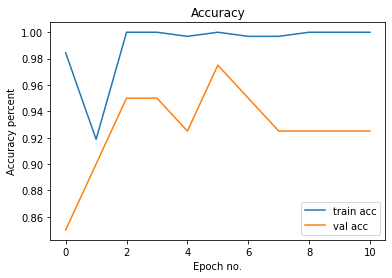

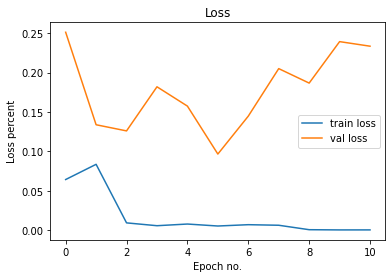

In [44]:
from tensorflow.keras.models import load_model
model1 = load_model('vgg.tf')
model2 = load_model('inception.tf')
import tensorflow.keras
import tensorflow as tf
#Initiating the usage of individual models
keras_model = tensorflow.keras.models.load_model('vgg.tf', compile=False) 
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('inception.tf', compile=False) 
keras_model2._name = 'model2'
models = [keras_model, keras_model2] #stacking individual models in a list
model_input = tf.keras.Input(shape=(224, 224, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model_vgg_inc = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

ensemble_model_vgg_inc.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = ensemble_model_vgg_inc.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('vggInception-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('vggInception-loss.png')
plt.show()

2/2 [==============================] - 36s 7s/step - loss: 0.0718 - accuracy: 0.9750


2/2 [==============================] - 36s 7s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



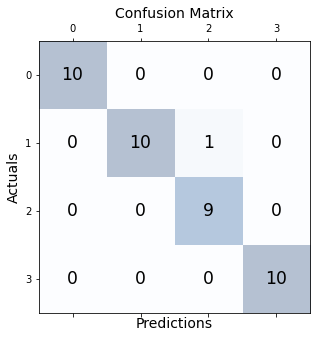

In [45]:
ensemble_model_vgg_inc.evaluate(test_x,test_y,batch_size=32)

# Ensemble Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=ensemble_model_vgg_inc.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [46]:
ensemble_model_vgg_inc.save('VGG_Inception.tf')

INFO:tensorflow:Assets written to: VGG_Inception.tf\assets


INFO:tensorflow:Assets written to: VGG_Inception.tf\assets


In [47]:
with open('VGG_Inception.pkl', 'wb') as file:
    pickle.dump(ensemble_model_vgg_inc, file)

INFO:tensorflow:Assets written to: ram://bc3c2857-b166-40a7-a95d-b20f1e2d7a00/assets


INFO:tensorflow:Assets written to: ram://bc3c2857-b166-40a7-a95d-b20f1e2d7a00/assets


# Inception + Resnet

Epoch 1/50
10/10 [==============================] - 133s 13s/step - loss: 0.6302 - accuracy: 0.8125 - val_loss: 0.5706 - val_accuracy: 0.7500
Epoch 2/50
10/10 [==============================] - 122s 12s/step - loss: 0.5367 - accuracy: 0.8000 - val_loss: 0.6198 - val_accuracy: 0.7500
Epoch 3/50
10/10 [==============================] - 122s 12s/step - loss: 0.5223 - accuracy: 0.8719 - val_loss: 0.7836 - val_accuracy: 0.8000
Epoch 4/50
10/10 [==============================] - 122s 12s/step - loss: 0.5219 - accuracy: 0.9000 - val_loss: 0.9129 - val_accuracy: 0.7500
Epoch 5/50
10/10 [==============================] - 121s 12s/step - loss: 0.5206 - accuracy: 0.8562 - val_loss: 0.9711 - val_accuracy: 0.7500
Epoch 6/50
10/10 [==============================] - 120s 12s/step - loss: 0.5199 - accuracy: 0.8938 - val_loss: 0.9944 - val_accuracy: 0.7750
Epoch 6: early stopping


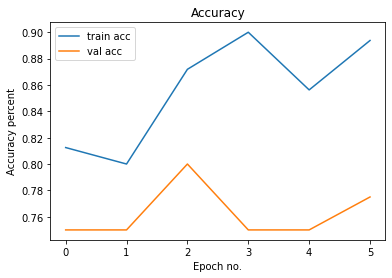

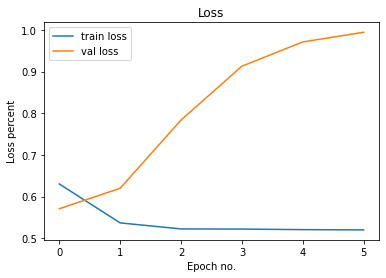

In [48]:
from tensorflow.keras.models import load_model
model1 = load_model('inception.tf')
model2 = load_model('resnet.tf')
import tensorflow.keras
import tensorflow as tf
#Initiating the usage of individual models
keras_model = tensorflow.keras.models.load_model('inception.tf', compile=False) 
keras_model._name = 'model1'
keras_model2 = tensorflow.keras.models.load_model('resnet.tf', compile=False) 
keras_model2._name = 'model2'
models = [keras_model, keras_model2] #stacking individual models in a list
model_input = tf.keras.Input(shape=(224, 224, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model_inc_res = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

ensemble_model_inc_res.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = ensemble_model_inc_res.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Accuracy percent') 
plt.title("Accuracy")
plt.savefig('incRes-acc.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch no.') 
plt.ylabel('Loss percent') 
plt.title("Loss")
plt.savefig('incRes-loss.png')
plt.show()

2/2 [==============================] - 15s 3s/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.90      0.75      0.82        12
           2       0.60      0.86      0.71         7
           3       1.00      0.83      0.91        12

    accuracy                           0.85        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.88      0.85      0.85        40



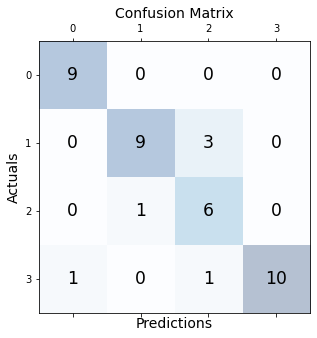

In [49]:
ensemble_model_inc_res.evaluate(test_x,test_y,batch_size=32)

# Ensemble Classification Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=ensemble_model_inc_res.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
conf_matrix = confusion_matrix(y_pred,test_y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [50]:
ensemble_model_inc_res.save('Inc_Res.tf')

INFO:tensorflow:Assets written to: Inc_Res.tf\assets


INFO:tensorflow:Assets written to: Inc_Res.tf\assets


In [51]:
with open('Inc_Res.pkl', 'wb') as file:
    pickle.dump(ensemble_model_inc_res, file)

INFO:tensorflow:Assets written to: ram://13a94d53-bfb8-4c30-bef7-3666c67b52b4/assets


INFO:tensorflow:Assets written to: ram://13a94d53-bfb8-4c30-bef7-3666c67b52b4/assets


# Interpreting Results

1/1 [==============================] - 2s 2s/step
ALL (0.6635)
AML (0.3364)
CLL (2.069e-05)


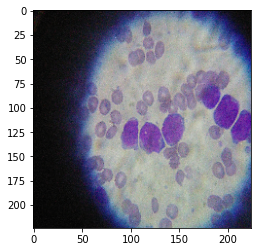

In [52]:
img = image.load_img('Test/ALL/20190114_150158.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step
AML (0.9947)
ALL (0.005264)
CLL (6.291e-09)


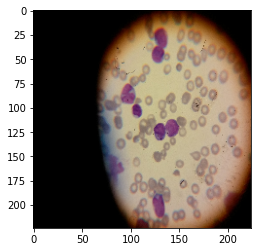

In [53]:
img = image.load_img('Test/AML/20190426_105606.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step
AML (0.9999)
CML (9.763e-05)
ALL (8.496e-06)


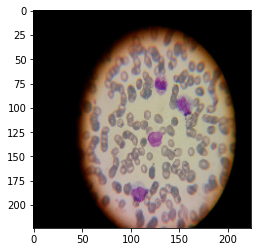

In [54]:
img = image.load_img('C:/Users/Tulsi Chopade/Downloads/Test/AML/20190513_180609.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step
AML (0.6193)
CLL (0.3332)
ALL (0.04746)


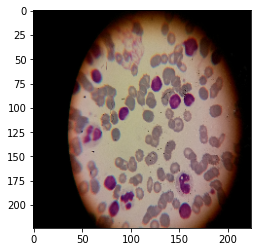

In [55]:
img = image.load_img('Test/CLL/20190507_192000.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step
CML (0.6667)
AML (0.3333)
ALL (9.67e-08)


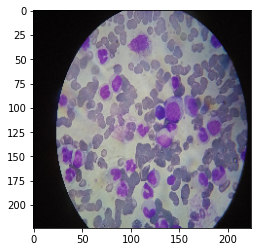

In [56]:
img = image.load_img('Test/CML/20190125_140556.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step
AML (0.3559)
CLL (0.3332)
ALL (0.3109)


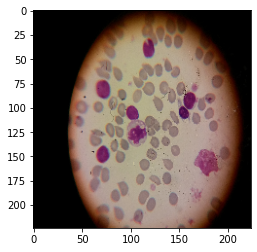

In [65]:
img = image.load_img('Test/CLL/20190507_191609.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = ['ALL','AML','CLL','CML']
proba = ensemble_model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))

1/1 [==============================] - 2s 2s/step


('CML', 0.666392)

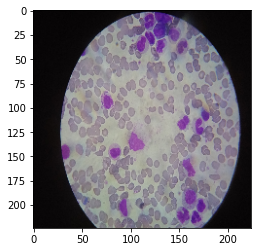

In [69]:
def result():
    img = image.load_img('Test/CML/20190125_143149.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    plt.imshow(img)
    classes = ['ALL','AML','CLL','CML']
    proba = ensemble_model.predict(img.reshape(1,224,224,3))
    top_3 = np.argsort(proba[0])[:-4:-1]
    for i in range(3):
        result = classes[top_3[i]]
        result2 = proba[0][top_3[i]]
        # print("{}".format(classes[top_3[i]])+" ({:.4})".format(proba[0][top_3[i]]))
        return result,result2
result()

# Save Weights

In [70]:
# VGG model
model_json = vgg_model.to_json()

with open("./vgg.json", "w") as json_file:
  json_file.write(model_json)

vgg_model.save_weights("./vgg.h5")

In [71]:
# Resnet model
model_json = resnet_model.to_json()

with open("./resnet.json", "w") as json_file:
  json_file.write(model_json)

resnet_model.save_weights("./resnet.h5")

In [72]:
# Inception model
model_json = InceptionV3_model.to_json()

with open("./inception.json", "w") as json_file:
  json_file.write(model_json)

InceptionV3_model.save_weights("./inception.h5")

In [73]:
# VGG_Resnet_Inception model
model_json = ensemble_model.to_json()

with open("./ensemble.json", "w") as json_file:
  json_file.write(model_json)

ensemble_model.save_weights("./ensemble.h5")

In [74]:
# ensemble_model_vgg_res model
model_json = ensemble_model_vgg_res.to_json()

with open("./VGG_Res.json", "w") as json_file:
  json_file.write(model_json)

ensemble_model_vgg_res.save_weights("./VGG_Res.h5")

In [75]:
# ensemble_model_vgg_inc Model
model_json = ensemble_model_vgg_inc.to_json()

with open("./VGG_Inc.json", "w") as json_file:
  json_file.write(model_json)

ensemble_model_vgg_inc.save_weights("./VGG_Inc.h5")

In [76]:
# ensemble_model_inc_res Model
model_json = ensemble_model_inc_res.to_json()

with open("./Inc_Res.json", "w") as json_file:
  json_file.write(model_json)

ensemble_model_inc_res.save_weights("./Inc_Res.h5")

In [77]:
tf.keras.models.save_model(vgg_model,'vgg.hdf5')
tf.keras.models.save_model(resnet_model,'resnet.hdf5')
tf.keras.models.save_model(InceptionV3_model,'inc.hdf5')
tf.keras.models.save_model(ensemble_model,'vgg_res_inc.hdf5')
tf.keras.models.save_model(ensemble_model_vgg_res,'vgg_res.hdf5')
tf.keras.models.save_model(ensemble_model_vgg_inc,'vgg_inc.hdf5')
tf.keras.models.save_model(ensemble_model_inc_res,'inc_res.hdf5')